In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import os
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



#Read in the data
def load_data():
    return pd.read_csv(r'C:\Users\Tom\movies.csv')

df = load_data()

In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#See if there's any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(('{} - {}%'.format(col, pct_missing)))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
#Data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
#change data type of columns
df = df.dropna()
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [6]:
#create corrected year column
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.head()



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [7]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [8]:
pd.set_option('display.max_rows',None)

In [9]:
#Drop any duplicates
df['company'].drop_duplicates().sort_values(ascending=False)
df['company'].head(20)

0                     Warner Bros.
1                Columbia Pictures
2                        Lucasfilm
3               Paramount Pictures
4                   Orion Pictures
5               Paramount Pictures
6               Universal Pictures
7     Chartoff-Winkler Productions
8                   Dovemead Films
9                   United Artists
10             The Malpaso Company
11                    C.A.T. Films
12              Paramount Pictures
13              Paramount Pictures
14               Filmways Pictures
15                 Rastar Pictures
17                       IPC Films
18           AVCO Embassy Pictures
20      Lorimar Film Entertainment
21            Partisan Productions
Name: company, dtype: object

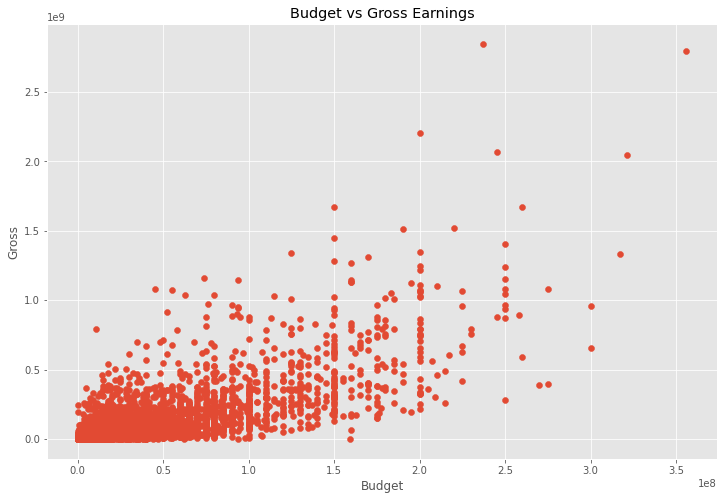

In [10]:
#scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

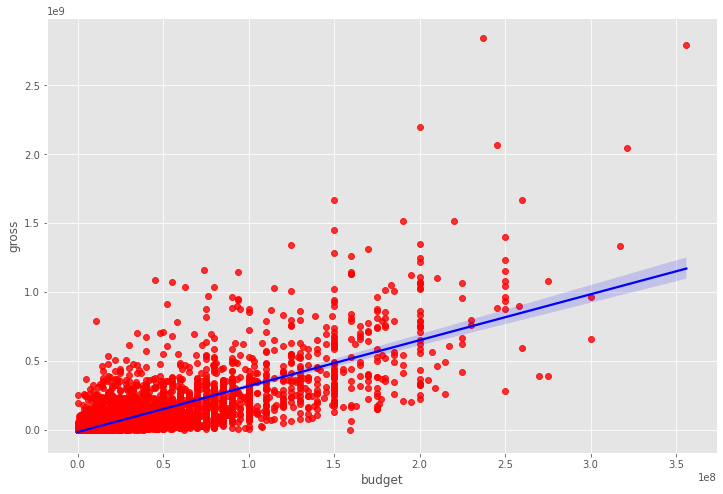

In [11]:
#Plot budget vs gross in seaborn
sns.regplot(x='budget', y='gross',data=df, scatter_kws={"color": "red"},line_kws=({"color": "blue"}))

In [12]:
df.corr(method='pearson')#pearson, kendall, spearman

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


In [13]:
# High correlation between budget and gross

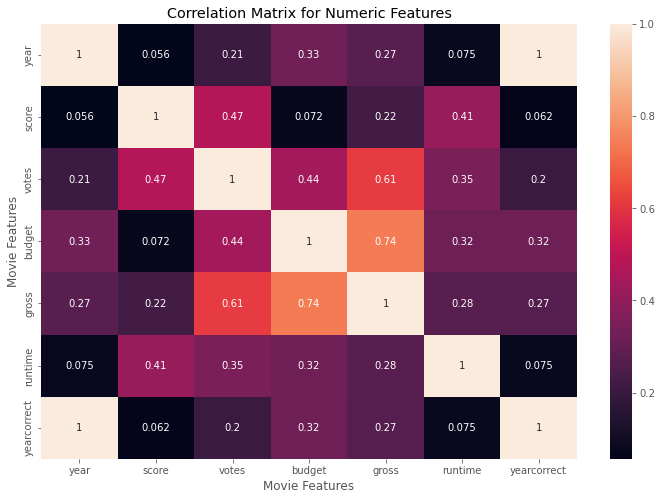

In [14]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [15]:
#Looks at Company
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         5421 non-null   object 
 1   rating       5421 non-null   object 
 2   genre        5421 non-null   object 
 3   year         5421 non-null   int64  
 4   released     5421 non-null   object 
 5   score        5421 non-null   float64
 6   votes        5421 non-null   float64
 7   director     5421 non-null   object 
 8   writer       5421 non-null   object 
 9   star         5421 non-null   object 
 10  country      5421 non-null   object 
 11  budget       5421 non-null   int64  
 12  gross        5421 non-null   int64  
 13  company      5421 non-null   object 
 14  runtime      5421 non-null   float64
 15  yearcorrect  5421 non-null   int32  
dtypes: float64(3), int32(1), int64(3), object(9)
memory usage: 698.8+ KB


In [18]:
def test_categorical_columns(df):
    results = {}
    
    # Define categorical and continuous columns based on dtypes
    categorical_cols = df.select_dtypes(include=['object']).columns
    continuous_cols = df.select_dtypes(include=['float64', 'int64', 'int32']).columns
    
    for cat_col in categorical_cols:
        for cont_col in continuous_cols:
            unique_vals = df[cat_col].unique()
            
            # If only two unique values, perform t-test
            if len(unique_vals) == 2:
                group1 = df[df[cat_col] == unique_vals[0]][cont_col]
                group2 = df[df[cat_col] == unique_vals[1]][cont_col]
                t_stat, p_val = stats.ttest_ind(group1, group2)
                results[(cat_col, cont_col)] = ('t-test', p_val)
            
            # If more than two unique values, perform ANOVA
            elif len(unique_vals) > 2:
                groups = [df[df[cat_col] == val][cont_col] for val in unique_vals]
                
                # Check for constant values in groups
                if any([group.std() == 0 for group in groups]):
                    results[(cat_col, cont_col)] = ('ANOVA', 'Skipped due to constant values in one or more groups')
                else:
                    f_stat, p_val = stats.f_oneway(*groups)
                    results[(cat_col, cont_col)] = ('ANOVA', p_val)
    
    return results



results = test_categorical_columns(df)
print(results)

{('name', 'year'): ('ANOVA', 0.9999999856543627), ('name', 'score'): ('ANOVA', 'Skipped due to constant values in one or more groups'), ('name', 'votes'): ('ANOVA', 0.8614215247860573), ('name', 'budget'): ('ANOVA', 'Skipped due to constant values in one or more groups'), ('name', 'gross'): ('ANOVA', 0.7412022818703385), ('name', 'runtime'): ('ANOVA', 'Skipped due to constant values in one or more groups'), ('name', 'yearcorrect'): ('ANOVA', 'Skipped due to constant values in one or more groups'), ('rating', 'year'): ('ANOVA', 2.9827538401399997e-50), ('rating', 'score'): ('ANOVA', 7.190353686991487e-20), ('rating', 'votes'): ('ANOVA', 4.143992388938286e-12), ('rating', 'budget'): ('ANOVA', 1.0778645700944159e-120), ('rating', 'gross'): ('ANOVA', 2.3053240502318686e-76), ('rating', 'runtime'): ('ANOVA', 2.0130337789528467e-45), ('rating', 'yearcorrect'): ('ANOVA', 3.227602215947078e-49), ('genre', 'year'): ('ANOVA', 4.570783356816805e-30), ('genre', 'score'): ('ANOVA', 4.88731747030889

In [19]:
# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(results.items(), columns=['Columns', 'Test_Result'])
results_df[['Categorical_Column', 'Continuous_Column']] = pd.DataFrame(results_df['Columns'].tolist(), index=results_df.index)
results_df[['Test_Type', 'p-value']] = pd.DataFrame(results_df['Test_Result'].tolist(), index=results_df.index)

# Drop the original columns
results_df = results_df.drop(columns=['Columns', 'Test_Result'])

# Ensure the p-value column is numeric
results_df['p-value'] = pd.to_numeric(results_df['p-value'], errors='coerce')

# Drop any rows where p-value could not be converted to a number
results_df = results_df.dropna(subset=['p-value'])

# Now try to sort by p-value
results_df = results_df.sort_values(by='p-value').reset_index(drop=True)

# Display the top 10 results
results_df.head(10)

,Categorical_Column,Continuous_Column,Test_Type,p-value
0,genre,budget,ANOVA,3.461207e-246
1,genre,runtime,ANOVA,1.578489e-198
2,genre,gross,ANOVA,2.072223e-137
3,rating,budget,ANOVA,1.077865e-120
4,genre,score,ANOVA,4.887317e-109
5,rating,gross,ANOVA,2.305324e-76
6,released,gross,ANOVA,7.898769e-63
7,director,gross,ANOVA,1.459813e-57
8,rating,year,ANOVA,2.982754e-50
9,rating,yearcorrect,ANOVA,3.227602e-49


In [20]:
# Let's filter the results_df to only include results where the p-value is less than 0.05
significant_results = results_df[results_df['p-value'] < 0.05].reset_index(drop=True)

significant_results.head()

,Categorical_Column,Continuous_Column,Test_Type,p-value
0,genre,budget,ANOVA,3.461207e-246
1,genre,runtime,ANOVA,1.578489e-198
2,genre,gross,ANOVA,2.072223e-137
3,rating,budget,ANOVA,1.077865e-120
4,genre,score,ANOVA,4.887317e-109


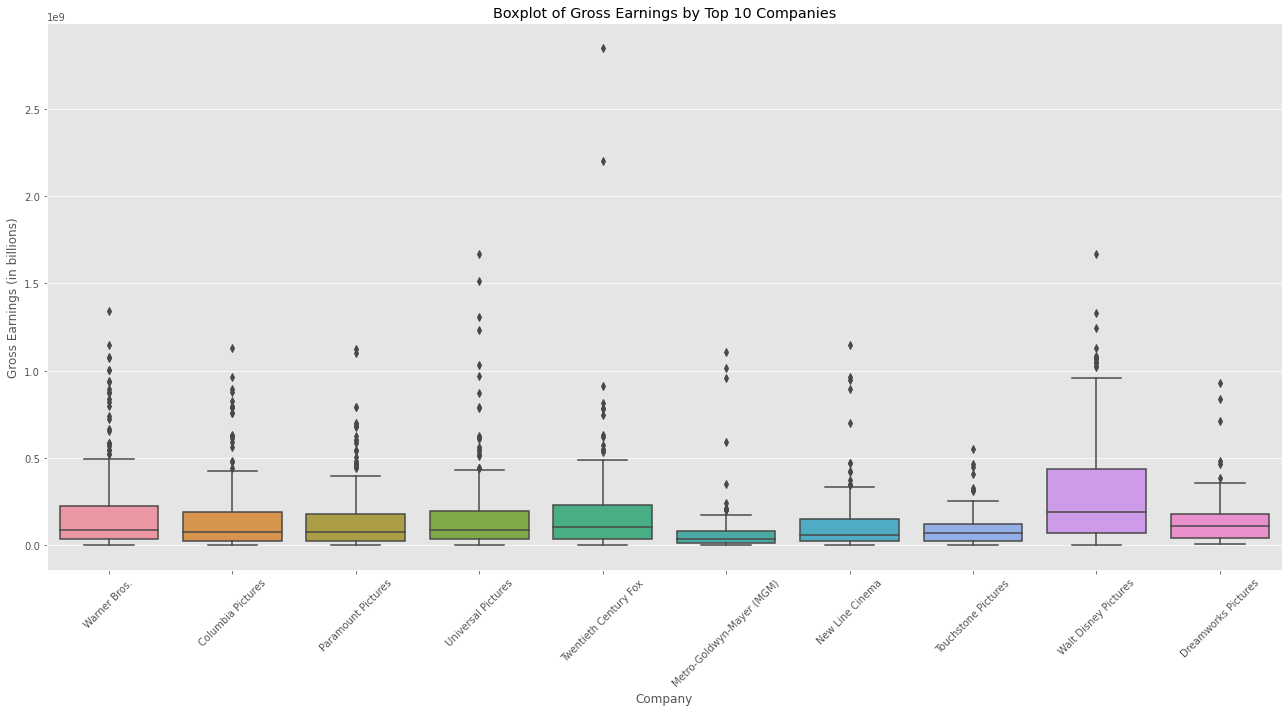

In [21]:
# Selecting top 10 companies based on the number of movies they've produced
top_companies = df['company'].value_counts().head(10).index

# Filtering the dataframe to only include these top companies
top_companies_df = df[df['company'].isin(top_companies)]

# Plotting boxplot for these top companies vs gross
plt.figure(figsize=(18, 10))
sns.boxplot(data=top_companies_df, x='company', y='gross')
plt.title('Boxplot of Gross Earnings by Top 10 Companies')
plt.xticks(rotation=45)
plt.ylabel('Gross Earnings (in billions)')
plt.xlabel('Company')
plt.tight_layout()
plt.show()